In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [7]:
from tensorflow.keras.datasets import cifar10

In [9]:
(x_train,y_train),(x_test,y_test) = cifar10.load_data()

170508288/170498071 [==============================] - 223s 1us/step


In [13]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)


In [14]:
x_test = x_test/255
x_train = x_train/255

In [15]:
from tensorflow.keras.utils import to_categorical

In [16]:
y_cat_train = to_categorical(y_train)
y_cat_test = to_categorical(y_test)


In [17]:
print(y_test[0])
print(y_cat_test[0])

[3]
[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]


In [30]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Dense,Flatten

model = Sequential()

In [31]:
model.add(Conv2D(filters=64,kernel_size=(3,3),input_shape=(32,32,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=64,kernel_size=(3,3),input_shape=(32,32,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(256,activation='relu'))
model.add(Dense(256,activation='relu'))
model.add(Dense(10,activation='softmax'))

In [32]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 30, 30, 64)        1792      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 15, 15, 64)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 13, 13, 64)        36928     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 2304)              0         
                                                                 
 dense_2 (Dense)             (None, 256)              

In [33]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['Accuracy']
    
    )

In [34]:
from tensorflow.keras.callbacks import EarlyStopping


In [35]:
early_stop = EarlyStopping(
    monitor='val_loss',
    min_delta=0,
    patience=2,
    verbose=0,
    mode='auto',
    baseline=None,
    restore_best_weights=False,
)

In [36]:
model.fit(
    x=x_train,
    y=y_cat_train,
    batch_size=32,
    epochs=15,
    verbose='auto',
    callbacks=[early_stop],
    validation_split=0.0,
    validation_data=(x_test,y_cat_test),
    shuffle=True,
    class_weight=None,
    sample_weight=None,
    initial_epoch=0,
    steps_per_epoch=None,
    validation_steps=None,
    validation_batch_size=32,
    validation_freq=1,
    max_queue_size=10,
    workers=1,
    use_multiprocessing=False,
)

Epoch 1/15
1563/1563 [==============================] - 59s 38ms/step - loss: 1.3935 - Accuracy: 0.4968 - val_loss: 1.1356 - val_Accuracy: 0.6023
Epoch 2/15
1563/1563 [==============================] - 63s 40ms/step - loss: 1.0200 - Accuracy: 0.6417 - val_loss: 1.0169 - val_Accuracy: 0.6474
Epoch 3/15
1563/1563 [==============================] - 86s 55ms/step - loss: 0.8484 - Accuracy: 0.7047 - val_loss: 1.0319 - val_Accuracy: 0.6465
Epoch 4/15
1563/1563 [==============================] - 75s 48ms/step - loss: 0.7182 - Accuracy: 0.7495 - val_loss: 0.9187 - val_Accuracy: 0.6927
Epoch 5/15
1563/1563 [==============================] - 76s 49ms/step - loss: 0.6115 - Accuracy: 0.7843 - val_loss: 0.8991 - val_Accuracy: 0.7057
Epoch 6/15
1563/1563 [==============================] - 76s 49ms/step - loss: 0.5152 - Accuracy: 0.8176 - val_loss: 0.9199 - val_Accuracy: 0.7094
Epoch 7/15
1563/1563 [==============================] - 77s 49ms/step - loss: 0.4234 - Accuracy: 0.8509 - val_loss: 1.0127 -

In [38]:
metrics = pd.DataFrame(model.history.history)
metrics.head()

,loss,Accuracy,val_loss,val_Accuracy
0,1.393511,0.49682,1.135558,0.6023
1,1.020020,0.64170,1.016930,0.6474
2,0.848446,0.70472,1.031925,0.6465
3,0.718198,0.74954,0.918745,0.6927
4,0.611466,0.78434,0.899057,0.7057


<AxesSubplot:>

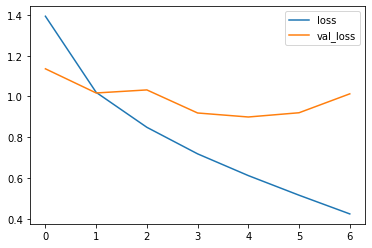

In [39]:
metrics[['loss','val_loss']].plot()

<AxesSubplot:>

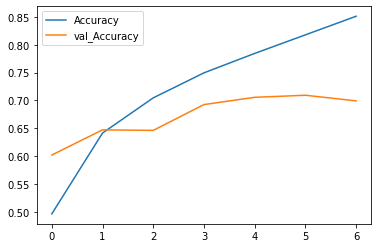

In [41]:
metrics[['Accuracy','val_Accuracy']].plot()

In [42]:
from sklearn.metrics import classification_report

In [44]:
predictions = model.predict(x_test)
predictions=np.round(predictions)
print(classification_report(y_cat_test,predictions))

              precision    recall  f1-score   support

           0       0.75      0.74      0.75      1000
           1       0.90      0.73      0.81      1000
           2       0.63      0.60      0.62      1000
           3       0.56      0.49      0.52      1000
           4       0.73      0.55      0.63      1000
           5       0.64      0.59      0.62      1000
           6       0.85      0.71      0.77      1000
           7       0.80      0.70      0.75      1000
           8       0.84      0.75      0.79      1000
           9       0.81      0.77      0.79      1000

   micro avg       0.75      0.66      0.70     10000
   macro avg       0.75      0.66      0.70     10000
weighted avg       0.75      0.66      0.70     10000
 samples avg       0.66      0.66      0.66     10000



C:\Users\AJ\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
